In [2]:
from pathlib import Path
from importlib import reload
from collections import defaultdict
import regex as re
import yaml
import traceback
import matplotlib.pyplot as plt

from ghub_utils import files
from ghub_utils import widgets as gwidg
from ReadFinalModule import ReadFinal
import EOFandPlots as eof
import analysis
import widgets as mwidg

<IPython.core.display.Javascript object>

In [3]:
models_dir = files.DIR_SAMPLE_DATA / 'models'

## Select Fields & Experiment

In [4]:
models_exclude = []
# models_exclude = exclude['thermal']
# models_exclude = exclude['libmassbf']
# models_exclude = exclude['thermal'] + exclude['ghf']
# models_exclude = exclude['dhdt']

### Initializing

In [5]:
# fields to read
# thermal = ['litempsnic', 'litempbot']
# strbasemag is missing somewhere in asmb and ctrl runs
# dynamic_read = ['uvelsurf', 'vvelsurf', 'uvelbase', 'vvelbase', 'strbasemag']
# dynamic_eof = ['velsurf', 'velbase', 'strbasemag']
# mass = ['lithk', 'orog', 'acabf']
#
# fields = dynamic_read + ['orog', 'acabf']
# eof_fields = dynamic_eof + ['orog', 'acabf']
# fields = dynamic_read + ['orog', 'dlithkdt']
# eof_fields = dynamic_eof + ['orog', 'dlithkdt']
# fields = dynamic_read + ['orog', 'dlithkdt', 'acabf']
# eof_fields = dynamic_eof + ['orog', 'dlithkdt', 'acabf']
# fields = dynamic_read + ['orog']# + ['lithk'] #['orog']
# eof_fields = dynamic_eof + ['orog'] # + ['lithk'] # + ['orog']
# fields = dynamic_read
# eof_fields = dynamic_eof
#
#
# fields = ['uvelsurf', 'vvelsurf', 'orog']
# eof_fields = ['velsurf', 'orog']
#
# fields = ['uvelsurf', 'vvelsurf', 'orog', 'acabf']
# eof_fields = ['velsurf', 'orog', 'acabf']
#
# use dhdt_exclude
# fields = ['uvelsurf', 'vvelsurf', 'orog', 'acabf', 'dlithkdt']
# eof_fields = ['velsurf', 'orog', 'acabf', 'dlithkdt']
#
# # use thermal_exclude
# fields = ['uvelsurf', 'vvelsurf', 'orog', 'acabf', 'litempsnic']
# eof_fields = ['velsurf', 'orog', 'acabf', 'litempsnic']
#
# fields = ['uvelbase', 'vvelbase', 'strbasemag']
# eof_fields = ['velbase', 'strbasemag']
#
# # use thermal_exclude
# fields = ['uvelbase', 'vvelbase', 'strbasemag', 'litempbot']
# eof_fields = ['velbase', 'strbasemag', 'litempbot']
#
# # use libmassbf_exclude
# fields = ['libmassbf']
# eof_fields = ['libmassbf']
# fields = ['uvelbase', 'vvelbase', 'strbasemag', 'libmassbf']
# eof_fields = ['velbase', 'strbasemag', 'libmassbf']
#
# # use thermal_exclude and libmassbf_exclude
# fields = ['uvelbase', 'vvelbase', 'strbasemag', 'litempbot', 'libmassbf']
# eof_fields = ['velbase', 'strbasemag', 'litempbot', 'libmassbf']
#
# # use libmassbf_exclude, dhdt_exclude
# fields = ['acabf', 'libmassbf', 'dlithkdt']
# eof_fields = ['acabf', 'libmassbf', 'dlithkdt']
#
# # use dhdt_exclude
# fields = ['acabf', 'dlithkdt']
# eof_fields = ['acabf', 'dlithkdt']
#
# # use thermal_exclude, bhf_exclude
# fields = ['litempsnic', 'litempbot', 'hfgeoubed']
# eof_fields = ['litempsnic', 'litempbot', 'hfgeoubed']
#
# # for all
# fields = ['lithk', 'uvelsurf', 'vvelsurf', 'acabf', 'uvelbase', 'vvelbase', 'strbasemag']
# eof_fields = ['lithk', 'velsurf', 'acabf', 'velbase', 'strbasemag']


# fields = ['orog']
# fields = ['uvelsurf', 'vvelsurf', 'lithk']
# fields = ['lithk']
# fields = ['uvelsurf', 'vvelsurf']
# fields = ['uvelbase', 'vvelbase']

# fields = ['acabf']
# fields = ['dlithkdt']
# fields = ['litempsnic']
# fields = ['strbasemag']
# fields = ['topg']
# fields = ['libmassbf']
# fields to analyze
# # note that velsurf will be created later from uvelsurf, vvelsurf
# eof_fields = ['velsurf', 'lithk']
# eof_fields = ['orog']
# eof_fields = ['lithk']
# eof_fields = ['velsurf']
# eof_fields = ['velbase']
# eof_fields = ['topg']
# eof_fields = ['libmassbf']
# eof_fields = ['acabf']
# eof_fields = ['dlithkdt']
# eof_fields = ['litempsnic']
# eof_fields = ['strbasemag']

# experiment = 'init'
experiment = 'ctrl'
# experiment = 'asmb'
# size of the first dimension of the data
step = 21  # only applies when experiment is ctrl or asmb

### Creating Selectors

In [10]:
reload(mwidg)

<module 'widgets' from '/home/rimov/Documents/Projects/ghub/cluster/initmip-cluster/src/widgets.py'>

In [11]:
f = mwidg.FeatureSelector(models_dir)
display(f)

FeatureSelector(children=(OptionToggle(children=(Label(value='Select:'), Button(description='Fields', style=Bu…

### Testing Plotting

In [5]:
reload(eof)

<module 'EOFandPlots2' from '/home/ruskirin/Documents/Projects/ghub/cluster/initmip-cluster/src/EOFandPlots2.py'>

In [6]:
figd = plt.Figure(figsize=(10,10))
figw = plt.Figure(figsize=(12,8))

In [7]:
from time import sleep

In [8]:
done = 9

['lithk', 'velsurf', 'acabf', 'velbase', 'strbasemag']


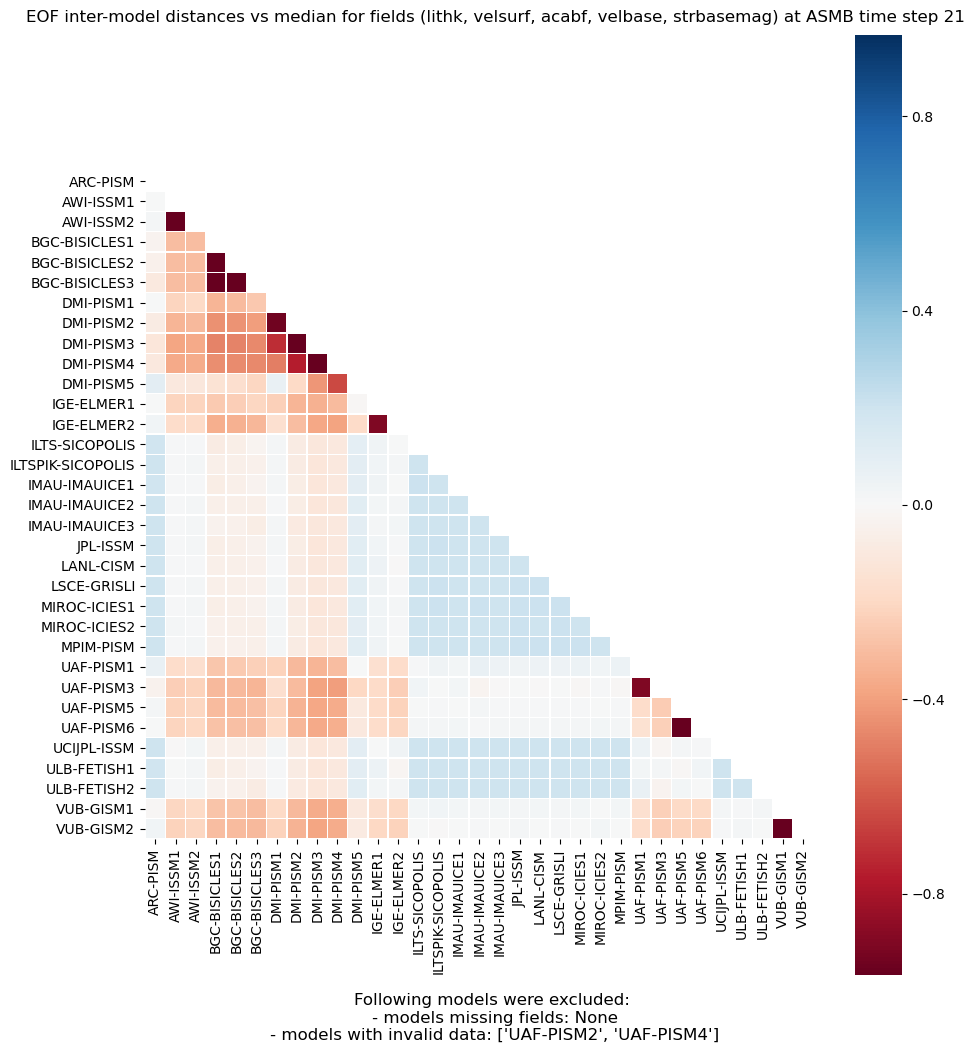

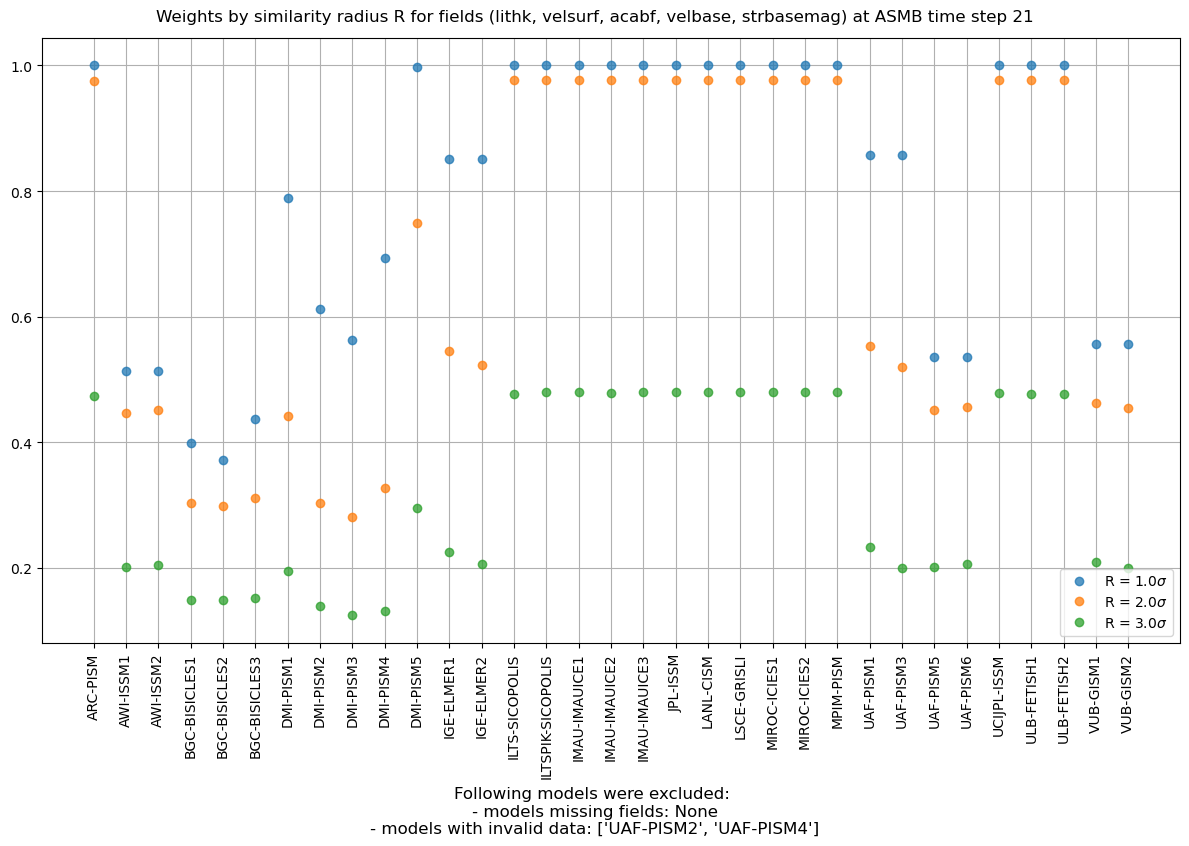

In [9]:
for e in analysis.EXPS[2:]:
    print(e)
    for fields in analysis.RUN_FIELDS[done:]:
        print(fields)
        eof.eof_and_plot(
            figd, figw, analysis.MODELS, fields, e, analysis.STEPS
        )
        done+=1
        sleep(2)

### Saving Output

In [40]:
%%capture cap
for pair, o in outcomes.items():
    print(pair)
    print(o)
    print('\n')
    print('-----------------------------------------------------------')

In [41]:
with open(files.DIR_SESS_RESULTS / 'test_output.txt', 'w') as f:
    f.write(cap.stdout)

### Getting Invalid Datasets

In [19]:
from importlib import reload

In [20]:
reload(eof)

<module 'EOFandPlots2' from '/home/ruskirin/Documents/Projects/ghub/cluster/initmip-cluster/src/EOFandPlots2.py'>

In [21]:
invalid = defaultdict(dict)

In [22]:
for exp in exps:
    inv = eof.eof_and_plot(models, list(fields.keys()), list(fields.values()), exp, step)
    invalid[exp] = inv

In [23]:
invalid

defaultdict(dict,
            {'ctrl': defaultdict(list,
                         {'lithk': [('UAF-PISM1',
                            array([9.96921e+36], dtype=float32))],
                          'strbasemag': [('UAF-PISM6',
                            array([9.96921e+36], dtype=float32))]}),
             'init': defaultdict(list, {}),
             'asmb': defaultdict(list,
                         {'strbasemag': [('UAF-PISM2',
                            array([9.96921e+36], dtype=float32)),
                           ('UAF-PISM4',
                            array([9.96921e+36], dtype=float32))]})})

### Testing Without Invalid Models

In [28]:
reload(eof)

<module 'EOFandPlots2' from '/home/ruskirin/Documents/Projects/ghub/cluster/initmip-cluster/src/EOFandPlots2.py'>

In [24]:
models_exclude = ['UAF-PISM1', 'UAF-PISM2', 'UAF-PISM6']
# models_exclude = exclude['thermal']
# models_exclude = exclude['libmassbf']
# models_exclude = exclude['thermal'] + exclude['ghf']
# models_exclude = exclude['dhdt']

In [25]:
# set difference is OK because no duplicate items
models = sorted(list(set(models_all).difference(models_exclude)))

In [29]:
eof.eof_and_plot(models, list(fields.keys()), list(fields.values()), exp, step)

KeyError: 'ARC-PISM'